In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/creditcard.csv.zip -d /content

Archive:  /content/drive/MyDrive/creditcard.csv.zip
  inflating: /content/creditcard.csv  


In [4]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
X = df.iloc[:,:-1]
y = df['Class']

In [5]:
frauds = df.loc[df['Class'] == 1]
legit = df.loc[df['Class'] == 0]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Neural Network 

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'Recall'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=1)
print("Loss: ", model.evaluate(X_test, y_test, verbose=0))

7566/7566 [==============================] - 33s 4ms/step - loss: 0.0219 - recall: 0.6784
Loss:  [0.0037899718154221773, 0.6212121248245239]


In [12]:
y_predicted = model.predict(X_test).T[0].astype(int)

1336/1336 [==============================] - 2s 1ms/step


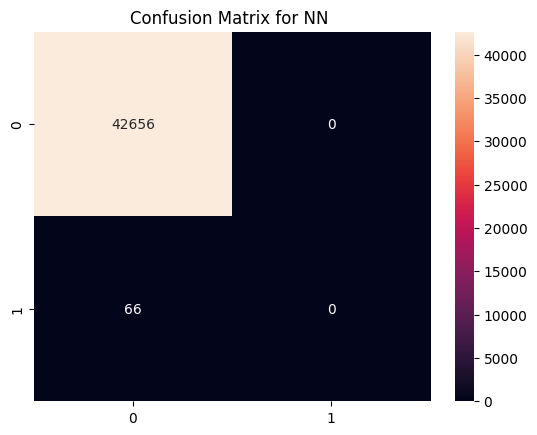

precision:  0.0
Recall: 0.0
Accuracy: 1.00
F1-Score: <function f1_score at 0x7f5c311ac310>


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,precision_score, recall_score,accuracy_score,f1_score


# Assume that y_true is a 1D array or list containing the true labels
# and y_pred is a 1D array or list containing the predicted labels
cm = confusion_matrix(y_test, y_predicted)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix for NN ")
# Show the plot
plt.show()
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
print("precision: ",precision)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy:.2f}')


F1_Score = f1_score(y_test, y_predicted)
print(f'F1-Score: {f1_score}')

###Even if we use Recall as performance metric, it is giving poor Recall value for class of interest, We will use SMOTE (Synthetic Minority Over-sampling Technique) to balance our Training Dataset

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [15]:
y_resampled = pd.DataFrame(y_resampled)
y_resampled.value_counts()

Class
0        241659
1        241659
dtype: int64

In [16]:
model.fit(X_resampled, y_resampled, epochs=1)

15104/15104 [==============================] - 62s 4ms/step - loss: 0.0297 - recall: 0.9924


In [17]:
print("Loss: ", model.evaluate(X_test, y_test, verbose=0))

Loss:  [0.016857201233506203, 0.7727272510528564]


In [18]:
y_predicted = model.predict(X_test).T[0].astype(int)

1336/1336 [==============================] - 3s 2ms/step


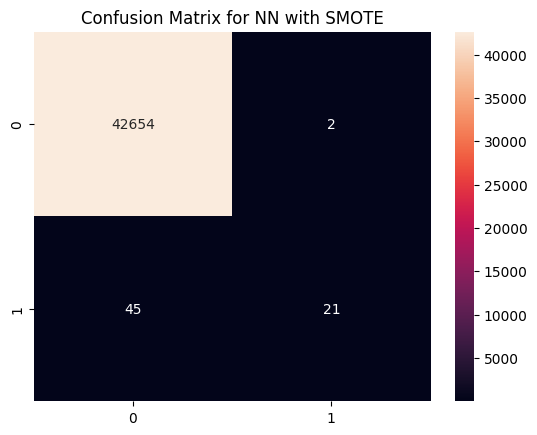

precision:  0.9130434782608695
Recall: 0.3181818181818182
Accuracy: 1.00
F1-Score: <function f1_score at 0x7f5c311ac310>


In [19]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix for NN with SMOTE")
plt.show()
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
print("precision: ",precision)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy:.2f}')


F1_Score = f1_score(y_test, y_predicted)
print(f'F1-Score: {f1_score}')

### Recall has significantly increased but still There are lot of scope of improvement which we will show Deep RL method

###Using Other models

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=10)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

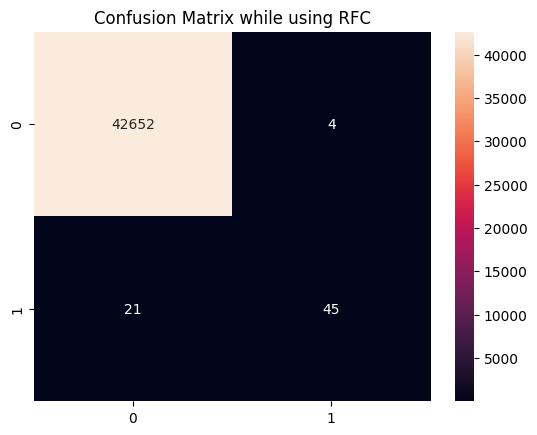

precision:  0.9183673469387755
Recall: 0.6818181818181818
Accuracy: 1.00
F1-Score: <function f1_score at 0x7f5c311ac310>


In [21]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix while using RFC")
plt.show()
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
print("precision: ",precision)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy:.2f}')


F1_Score = f1_score(y_test, y_predicted)
print(f'F1-Score: {f1_score}')

<ipython-input-22-741d9e3d3739>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_resampled, y_resampled)


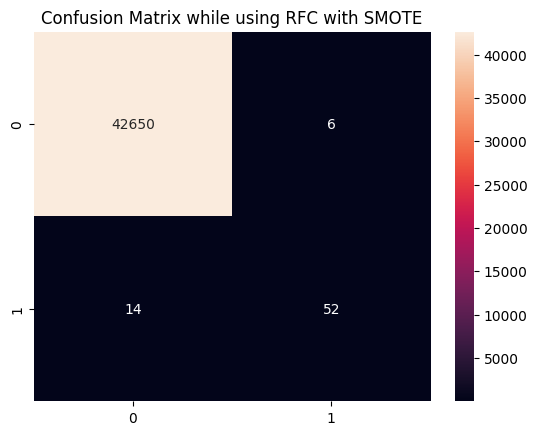

precision:  0.896551724137931
Recall: 0.7878787878787878
Accuracy: 1.00
F1-Score: <function f1_score at 0x7f5c311ac310>


In [22]:
clf.fit(X_resampled, y_resampled)
y_predicted = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix while using RFC with SMOTE")
plt.show()
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
print("precision: ",precision)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy:.2f}')

F1_Score = f1_score(y_test, y_predicted)
print(f'F1-Score: {f1_score}')

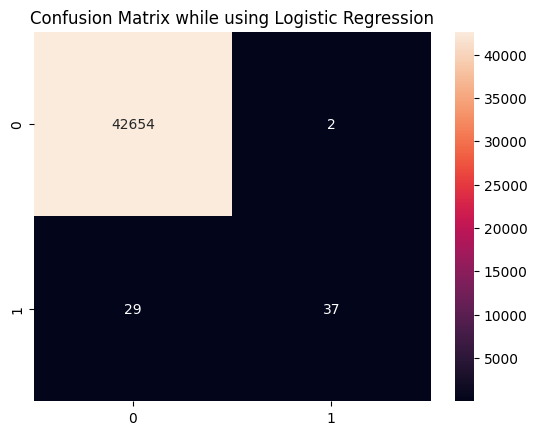

precision:  0.9487179487179487
Recall: 0.5606060606060606
Accuracy: 1.00
F1-Score: <function f1_score at 0x7f5c311ac310>


In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix while using Logistic Regression")
plt.show()
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
print("precision: ",precision)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy:.2f}')


F1_Score = f1_score(y_test, y_predicted)
print(f'F1-Score: {f1_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


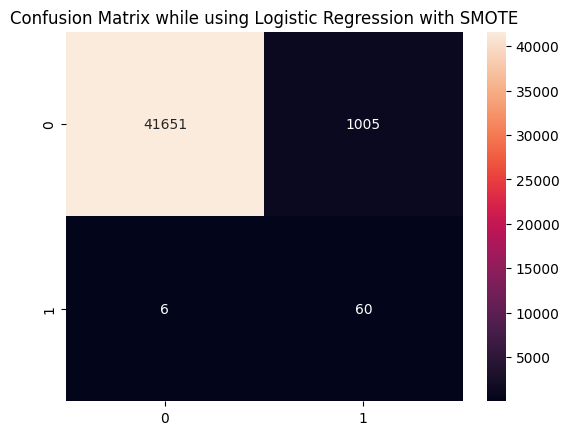

precision:  0.056338028169014086
Recall: 0.9090909090909091
Accuracy: 0.9763353775572304
F1-Score: <function f1_score at 0x7f5c311ac310>


In [24]:
logreg.fit(X_resampled, y_resampled)
y_predicted = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix while using Logistic Regression with SMOTE")
plt.show()
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
print("precision: ",precision)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy}')


F1_Score = f1_score(y_test, y_predicted)
print(f'F1-Score: {f1_score}')